## Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## Importing datasets

In [2]:
#Recipes_Dataset

# Load in csv
recipes_df = pd.read_csv("./Project_Data/RAW_recipes.csv")
recipes_df.head()



name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [3]:
#Reviews Dataset
interaction_df=pd.read_csv("./Project_Data/RAW_interactions.csv")
interaction_df.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [4]:
#McDonald's Dataset
mcd_nutrition_df=pd.read_csv("./Project_Data/menu.csv")
mcd_nutrition_df.head()


Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                             25        0.0  ...             31   
1                             15        0.0  ...             30   
2                             42        0.0  ...             29   
3                             52        0.0  ...             30   
4                             42        0.0  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 24 columns]

In [5]:
#Nutrition dataset
df=pd.read_csv("./Project_Data/ABBREV.csv")
df

NDB_No                   Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0       1001            BUTTER,WITH SALT      15.87         717         0.85   
1       1002    BUTTER,WHIPPED,WITH SALT      15.87         717         0.85   
2       1003        BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3       1004                 CHEESE,BLUE      42.41         353        21.40   
4       1005                CHEESE,BRICK      41.11         371        23.24   
...      ...                         ...        ...         ...          ...   
8613   83110             MACKEREL,SALTED      43.00         305        18.50   
8614   90240  SCALLOP,(BAY&SEA),CKD,STMD      70.25         111        20.54   
8615   90480                  SYRUP,CANE      26.00         269         0.00   
8616   90560                   SNAIL,RAW      79.20          90        16.10   
8617   93600            TURTLE,GREEN,RAW      78.50          89        19.80   

      Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  \
0             81.11     2.11            0.06           0.0           0.06   
1             81.11     2.11            0.06           0.0           0.06   
2             99.48     0.00            0.00           0.0           0.00   
3             28.74     5.11            2.34           0.0           0.50   
4             29.68     3.18            2.79           0.0           0.51   
...             ...      ...             ...           ...            ...   
8613          25.10    13.40            0.00           0.0           0.00   
8614           0.84     2.97            5.41           0.0           0.00   
8615           0.00     0.86           73.14           0.0          73.20   
8616           1.40     1.30            2.00           0.0           0.00   
8617           0.50     1.20            0.00           0.0           0.00   

      ...  Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  \
0     ...         7.0      51.368       21.021        3.043           215.0   
1     ...         7.0      50.489       23.426        3.012           219.0   
2     ...         8.6      61.924       28.732        3.694           256.0   
3     ...         2.4      18.669        7.778        0.800            75.0   
4     ...         2.5      18.764        8.598        0.784            94.0   
...   ...         ...         ...          ...          ...             ...   
8613  ...         7.8       7.148        8.320        6.210            95.0   
8614  ...         0.0       0.218        0.082        0.222            41.0   
8615  ...         0.0       0.000        0.000        0.000             0.0   
8616  ...         0.1       0.361        0.259        0.252            50.0   
8617  ...         0.1       0.127        0.088        0.170            50.0   

      GmWt_1                          GmWt_Desc1  GmWt_2  \
0        5.0          1 pat,  (1" sq, 1/3" high)    14.2   
1        3.0          1 pat,  (1" sq, 1/3" high)     9.4   
2       12.0                              1 tbsp   205.0   
3       28.0                                1 oz    17.0   
4      132.0                        1 cup, diced   113.0   
...      ...                                 ...     ...   
8613    80.0  1 piece,  (5-1/2" x 1-1/2" x 1/2")    17.0   
8614    85.0                                3 oz     NaN   
8615    21.0                           1 serving     NaN   
8616    85.0                                3 oz     NaN   
8617    85.0                                3 oz     NaN   

                  GmWt_Desc2  Refuse_Pct  
0                     1 tbsp         0.0  
1                     1 tbsp         0.0  
2                      1 cup         0.0  
3               1 cubic inch         0.0  
4            1 cup, shredded         0.0  
...                      ...         ...  
8613  1 cubic inch, boneless         0.0  
8614                     NaN         0.0  
8615                     NaN         0.0  
8616                

## McDonald's output based on Carlories

In [6]:
#getting the user input for calories and printing the menu from mcdonalds

category_unique = mcd_nutrition_df["Category"].unique()

print("Please select from the categories below:")
for i in range(0, len(category_unique)):
    print(category_unique[i])
category_response = input("What kind of food category would you like?").title()
response = input("What is the maximum calorie intake that you would like?")
answers = []
calorie = []
category_list = []
for index,rows in mcd_nutrition_df.iterrows():
    calories = rows["Calories"]
    category = rows["Category"]
    if calories <= int(response) and category == category_response:
        answers.append(rows["Item"])
        calorie.append(rows["Calories"])
        category_list.append(rows["Category"])
answers_df = pd.DataFrame({"Menu Items": answers,
                          "Calorie": calorie,
                          "Category": category_list})
answers_df

Please select from the categories below:
Breakfast
Beef & Pork
Chicken & Fish
Salads
Snacks & Sides
Desserts
Beverages
Coffee & Tea
Smoothies & Shakes
What kind of food category would you like?Breakfast
What is the maximum calorie intake that you would like?600


Menu Items  Calorie   Category
0                                        Egg McMuffin      300  Breakfast
1                                   Egg White Delight      250  Breakfast
2                                    Sausage McMuffin      370  Breakfast
3                           Sausage McMuffin with Egg      450  Breakfast
4                    Sausage McMuffin with Egg Whites      400  Breakfast
5                                Steak & Egg McMuffin      430  Breakfast
6       Bacon, Egg & Cheese Biscuit (Regular Biscuit)      460  Breakfast
7         Bacon, Egg & Cheese Biscuit (Large Biscuit)      520  Breakfast
8   Bacon, Egg & Cheese Biscuit with Egg Whites (R...      410  Breakfast
9   Bacon, Egg & Cheese Biscuit with Egg Whites (L...      470  Breakfast
10                  Sausage Biscuit (Regular Biscuit)      430  Breakfast
11                    Sausage Biscuit (Large Biscuit)      480  Breakfast
12         Sausage Biscuit with Egg (Regular Biscuit)      510  Breakfast
13           Sausage Biscuit with Egg (Large Biscuit)      570  Breakfast
14  Sausage Biscuit with Egg Whites (Regular Biscuit)      460  Breakfast
15    Sausage Biscuit with Egg Whites (Large Biscuit)      520  Breakfast
16   Southern Style Chicken Biscuit (Regular Biscuit)      410  Breakfast
17     Southern Style Chicken Biscuit (Large Biscuit)      470  Breakfast
18              Steak & Egg Biscuit (Regular Biscuit)      540  Breakfast
19                     Bacon, Egg & Cheese McGriddles      460  Breakfast
20     Bacon, Egg & Cheese McGriddles with Egg Whites      400  Breakfast
21                                 Sausage McGriddles      420  Breakfast
22                   Sausage, Egg & Cheese McGriddles      550  Breakfast
23   Sausage, Egg & Cheese McGriddles with Egg Whites      500  Breakfast
24          Bacon, Egg & Cheese Bagel with Egg Whites      570  Breakfast
25                                           Hotcakes      350  Breakfast
26                               Hotcakes and Sausage      520  Breakfast
27                                    Sausage Burrito      300  Breakfast
28                                         Hash Brown      150  Breakfast
29                                     Cinnamon Melts      460  Breakfast
30                              Fruit & Maple Oatmeal      290  Breakfast
31          Fruit & Maple Oatmeal without Brown Sugar      260  Breakfast

## Cleaning recipes and merging with reviews

In [7]:
#dropping all rows with missing information
recipes_df = recipes_df.dropna(how='any')
recipes_df.count()

name              226657
id                226657
minutes           226657
contributor_id    226657
submitted         226657
tags              226657
nutrition         226657
n_steps           226657
steps             226657
description       226657
ingredients       226657
n_ingredients     226657
dtype: int64

In [8]:
#dropping all rows with missing information
interaction_df=interaction_df.dropna(how='any')
interaction_df.count()

user_id      1132198
recipe_id    1132198
date         1132198
rating       1132198
review       1132198
dtype: int64

In [9]:
#changing the columns name for merging
recipes_df=recipes_df.rename(columns={'id': 'recipe_id'})
recipes_df.head()

name  recipe_id  minutes  \
0  arriba   baked winter squash mexican style     137739       55   
1            a bit different  breakfast pizza      31490       30   
2                   all in the kitchen  chili     112140      130   
3                          alouette  potatoes      59389       45   
4          amish  tomato ketchup  for canning      44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [10]:
#grouping by recipe id to find the maximum reviews count and finding teh recipe that is reviewed maximum
count_of_reviews=interaction_df.groupby(interaction_df['recipe_id']).count()['user_id']
average_rating=interaction_df.groupby(interaction_df['recipe_id']).mean()['rating']
recipe_reviews_df=pd.DataFrame({'total reviews': count_of_reviews,
                               'average rating':average_rating})
recipe_reviews_df

total reviews  average rating
recipe_id                               
38                     4        4.250000
39                     1        3.000000
40                     9        4.333333
41                     2        4.500000
43                     1        1.000000
...                  ...             ...
537459                 1        5.000000
537485                 1        5.000000
537543                 1        0.000000
537671                 1        0.000000
537716                 1        5.000000

[231630 rows x 2 columns]

In [11]:
#merging the reviews dataframe with the recipes by id

recipe_reviews_df=recipe_reviews_df.merge(recipes_df,on='recipe_id',how='left')
recipe_reviews_df=recipe_reviews_df.dropna()

In [12]:
# taking recipes that have more than 25 reviews and splitting calories and other nutrients
recipes_25_reviews=recipe_reviews_df.loc[recipe_reviews_df['total reviews']>=25]

Calories=[]
total_fat=[]
sugar=[]
sodium=[]
protein=[]

for index,rows in recipes_25_reviews.iterrows():
    nutri=rows['nutrition'].strip('][').split(', ')
    Calories.append(nutri[0])
    total_fat.append(nutri[1])
    sugar.append(nutri[2])
    sodium.append(nutri[3])
    protein.append(nutri[4])
    
    
recipes_25_reviews["Calories"]=Calories
recipes_25_reviews['Total Fat']=total_fat
recipes_25_reviews['sugar']=sugar
recipes_25_reviews['sodium']=sodium
recipes_25_reviews['protein']=protein

recipes_25_reviews["Calories"]=pd.to_numeric(recipes_25_reviews["Calories"])
recipes_25_reviews["Total Fat"]=pd.to_numeric(recipes_25_reviews["Total Fat"])
recipes_25_reviews["sugar"]=pd.to_numeric(recipes_25_reviews["sugar"])
recipes_25_reviews["sodium"]=pd.to_numeric(recipes_25_reviews["sodium"])
recipes_25_reviews["protein"]=pd.to_numeric(recipes_25_reviews["protein"])

recipes_25_reviews.head()

<ipython-input-12-b189ea2cb462>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews["Calories"]=Calories
<ipython-input-12-b189ea2cb462>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews['Total Fat']=total_fat
<ipython-input-12-b189ea2cb462>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

recipe_id  total reviews  average rating  \
59         153             48        3.791667   
82         192             29        4.689655   
87         198             49        4.367347   
112        246             65        4.615385   
168        346             30        4.433333   

                                                  name  minutes  \
59                  amish friendship bread and starter     70.0   
82                                classic cream scones     85.0   
87                      chinese hot and sour pork soup     40.0   
112                                 lee s hot crab dip     45.0   
168  potatoes tapas in garlic mayonnaise  potatoes ...     20.0   

     contributor_id   submitted  \
59           1540.0  1999-09-06   
82           1609.0  1999-08-13   
87           1545.0  1999-09-18   
112         25843.0  1999-09-01   
168          1589.0  1999-08-18   

                                                  tags  \
59   ['time-to-make', 'course', 'cuisine', 'prepara...   
82   ['weeknight', 'time-to-make', 'course', 'prepa...   
87   ['60-minutes-or-less', 'time-to-make', 'course...   
112  ['60-minutes-or-less', 'time-to-make', 'course...   
168  ['30-minutes-or-less', 'time-to-make', 'course...   

                                        nutrition  n_steps  \
59   [615.9, 32.0, 260.0, 15.0, 16.0, 19.0, 33.0]     19.0   
82       [168.2, 12.0, 28.0, 3.0, 5.0, 24.0, 7.0]     20.0   
87    [368.7, 20.0, 41.0, 60.0, 63.0, 14.0, 10.0]     11.0   
112     [180.7, 23.0, 7.0, 16.0, 16.0, 40.0, 1.0]      8.0   
168       [184.2, 15.0, 10.0, 8.0, 4.0, 7.0, 7.0]      4.0   

                                                 steps  \
59   ['place one cup each sugar , milk , and flour ...   
82   ['preheat oven to 425f', 'lightly butter a bak...   
87   ['bring stock to a simmer', 'add soy sauce , p...   
112  ['remove cartilage from crab meat', 'in a larg...   
168  ['boil potatoes in salt water until tender', '...   

                                           description  \
59   many recipes have been posted for the amish br...   
82   you're best off describing scones to a german ...   
87     edited recipe from other viewers recomendations   
112                                 lee's hot crab dip   
168  "tapas, the little dishes of spain" by penelop...   

                                           ingredients  n_ingredients  \
59   ['sugar', 'milk', 'flour', 'oil', 'eggs', 'van...           12.0   
82   ['all-purpose flour', 'granulated sugar', 'bak...            9.0   
87   ['chicken stock', 'lean pork', 'garlic and red...           17.0   
112  ['crabmeat', 'cream cheese', 'sour cream', 'ma...           10.0   
168  ['salad potatoes', 'mayonnaise', 'garlic clove...            5.0   

     Calories  Total Fat  sugar  sodium  protein  
59      615.9       32.0  260.0    15.0     16.0  
82      168.2       12.0   28.0     3.0      5.0  
87      368.7       20.0   41.0    60.0     63.0  
112     180.7       23.0    7.0    16.0     16.0  
168     184.2       15.0   10.0     8.0      4.0

In [13]:
#to see whole of ingredients
pd.set_option("display.max_colwidth",-1)

<ipython-input-13-0443aa88ce94>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1)


### printing recipes in certain calories range

In [34]:
answers_recipes = []
calorie_recipes = []
ingredients=[]
ratings=[]
steps=[]
for index,rows in recipes_25_reviews.iterrows():
    cal = rows["Calories"]
    if cal <= int(response):
        answers_recipes.append(rows["name"])
        calorie_recipes.append(rows["Calories"])
        ingredients.append(rows['ingredients'])
        ratings.append(rows['average rating'])
        steps.append(rows['n_steps'])
answers_recipes_df = pd.DataFrame({"Recipes": answers_recipes,
                          "Calories": calorie_recipes,
                          "Ingredients for recipes": ingredients,
                           "Ratings" : ratings,
                                  "No of Steps": steps})
answers_recipes_df=answers_recipes_df.sort_values(by=["Ratings","Calories"], ascending=False)
print("Check out these recipes in similar caloric range")
top_15=answers_recipes_df.head(15)
top_15=top_5.reset_index()
top_15


Check out these recipes in similar caloric range


level_0  index                                             Recipes  \
0   0        4637   crunchy valley chicken  rsc                          
1   1        3073   sage and rosemary pork chops                         
2   2        4202   kittencal s parmesan orzo                            
3   3        659    berry cream cheese coffee cake                       
4   4        4528   breakfast casserole seasoned with country gravy      
5   5        2114   worm sandwiches                                      
6   6        3656   kittencal s caesar tortellini salad                  
7   7        1346   strawberry cheese ring                               
8   8        1635   caprese salad tomatoes  italian marinated tomatoes   
9   9        3634   kittencal s really great old fashioned lemonade      
10  10       1737   chocolate covered strawberries                       
11  11       3928   broiled cinnamon toast                               
12  12       2543   cranberry nut swirls                                 
13  13       4211   iced coffee mocha                                    
14  14       691    autumn chicken salad                                 

    Calories  \
0   598.4      
1   546.7      
2   442.5      
3   415.8      
4   349.1      
5   307.6      
6   287.7      
7   189.9      
8   137.5      
9   118.4      
10  116.6      
11  80.6       
12  65.1       
13  57.8       
14  114.3      

                                                                                                                                                                                                                                                                                                            Ingredients for recipes  \
0   ['hidden valley original ranch dressing mix', 'salted butter', 'celery', 'white onion', 'olive oil', 'boneless skinless chicken breast halves', 'sliced water chestnuts', 'greek yogurt', 'mayonnaise', 'fresh chives', 'dried cranberries', 'cooked white rice', 'ground black pepper', 'panko breadcrumbs', 'sliced almonds']   
1   ['pork loin chops', 'olive oil', 'dried sage', 'black and red pepper blend', 'dried rosemary leaves', 'salt']                                                                                                                                                                                                                     
2   ['butter', 'onion', 'dried thyme', 'crushed red pepper flakes', 'orzo pasta', 'garlic', 'canned chicken broth', 'parmesan cheese', 'coarse black pepper', 'seasoning salt']                                                                                                                                                       
3   ['flour', 'sugar', 'margarine', 'baking powder', 'baking soda', 'salt', 'sour cream', 'egg', 'almond extract', 'cream cheese', 'raspberry preserves', 'sliced almonds']                                                                                                                                                           
4   ['country gravy mix', 'tater tots', 'sausage', 'water', 'eggs', 'cheddar cheese']                                                                                                                                                                                                                                                 
5   ['hot dog', 'hot dog buns', 'water', 'ketchup']                                                                                                                                                                                                                                                                                   
6   ['cheese tortellini', 'romaine lettuce', 'caesar salad dressing', 'parmesan cheese', 'cherry tomatoes', 'caesar-flavor croutons', 'black pepper', 'salt']                                                                                                                    

In [37]:
#printing ingredients list
#converting the ingrideints into list

ingredients=top_5['Ingredients for recipes']
ingredient_list=[]
n=0
for i in ingredients:
    ingri=i.strip('][').split(', ')
    ingredient_list.append(ingri)
print("Here is the ingredients list to shop")
for j in ingredient_list:
        print(f'For the recipe {top_5["Recipes"][n]} the ingredients are:' )
        print("==============================================================================================")
        s_list=j;
        for ing in s_list:
            print(ing)
        if(n!=len(top_5)):
            n=n+1
        print("==============================================================================================")

Here is the ingredients list to shop
For the recipe crunchy valley chicken  rsc the ingredients are:
'hidden valley original ranch dressing mix'
'salted butter'
'celery'
'white onion'
'olive oil'
'boneless skinless chicken breast halves'
'sliced water chestnuts'
'greek yogurt'
'mayonnaise'
'fresh chives'
'dried cranberries'
'cooked white rice'
'ground black pepper'
'panko breadcrumbs'
'sliced almonds'
For the recipe sage and rosemary pork chops the ingredients are:
'pork loin chops'
'olive oil'
'dried sage'
'black and red pepper blend'
'dried rosemary leaves'
'salt'
For the recipe kittencal s parmesan orzo the ingredients are:
'butter'
'onion'
'dried thyme'
'crushed red pepper flakes'
'orzo pasta'
'garlic'
'canned chicken broth'
'parmesan cheese'
'coarse black pepper'
'seasoning salt'
For the recipe berry cream cheese coffee cake the ingredients are:
'flour'
'sugar'
'margarine'
'baking powder'
'baking soda'
'salt'
'sour cream'
'egg'
'almond extract'
'cream cheese'
'raspberry preserves'

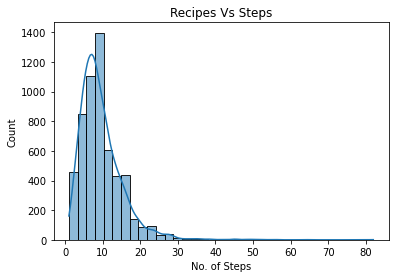

In [18]:
#plotting no of steps
sns.histplot(data=recipes_25_reviews, x="n_steps",kde=True,bins=35)
plt.title("Recipes Vs Steps")
plt.xlabel("No. of Steps")
plt.savefig("./Charts/RecipesVsSteps.png")
plt.show()

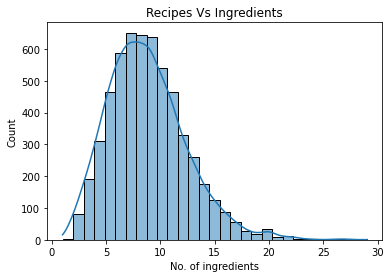

In [19]:
#Plotting the number of ingredients
sns.histplot(data=recipes_25_reviews, x="n_ingredients",bins=29,kde=True)
plt.title("Recipes Vs Ingredients")
plt.xlabel("No. of ingredients")
plt.savefig("./Charts/RecipesVsIngredients.png")
plt.show()

In [31]:
pip install wordcloud

Want to see the most common ingredients?


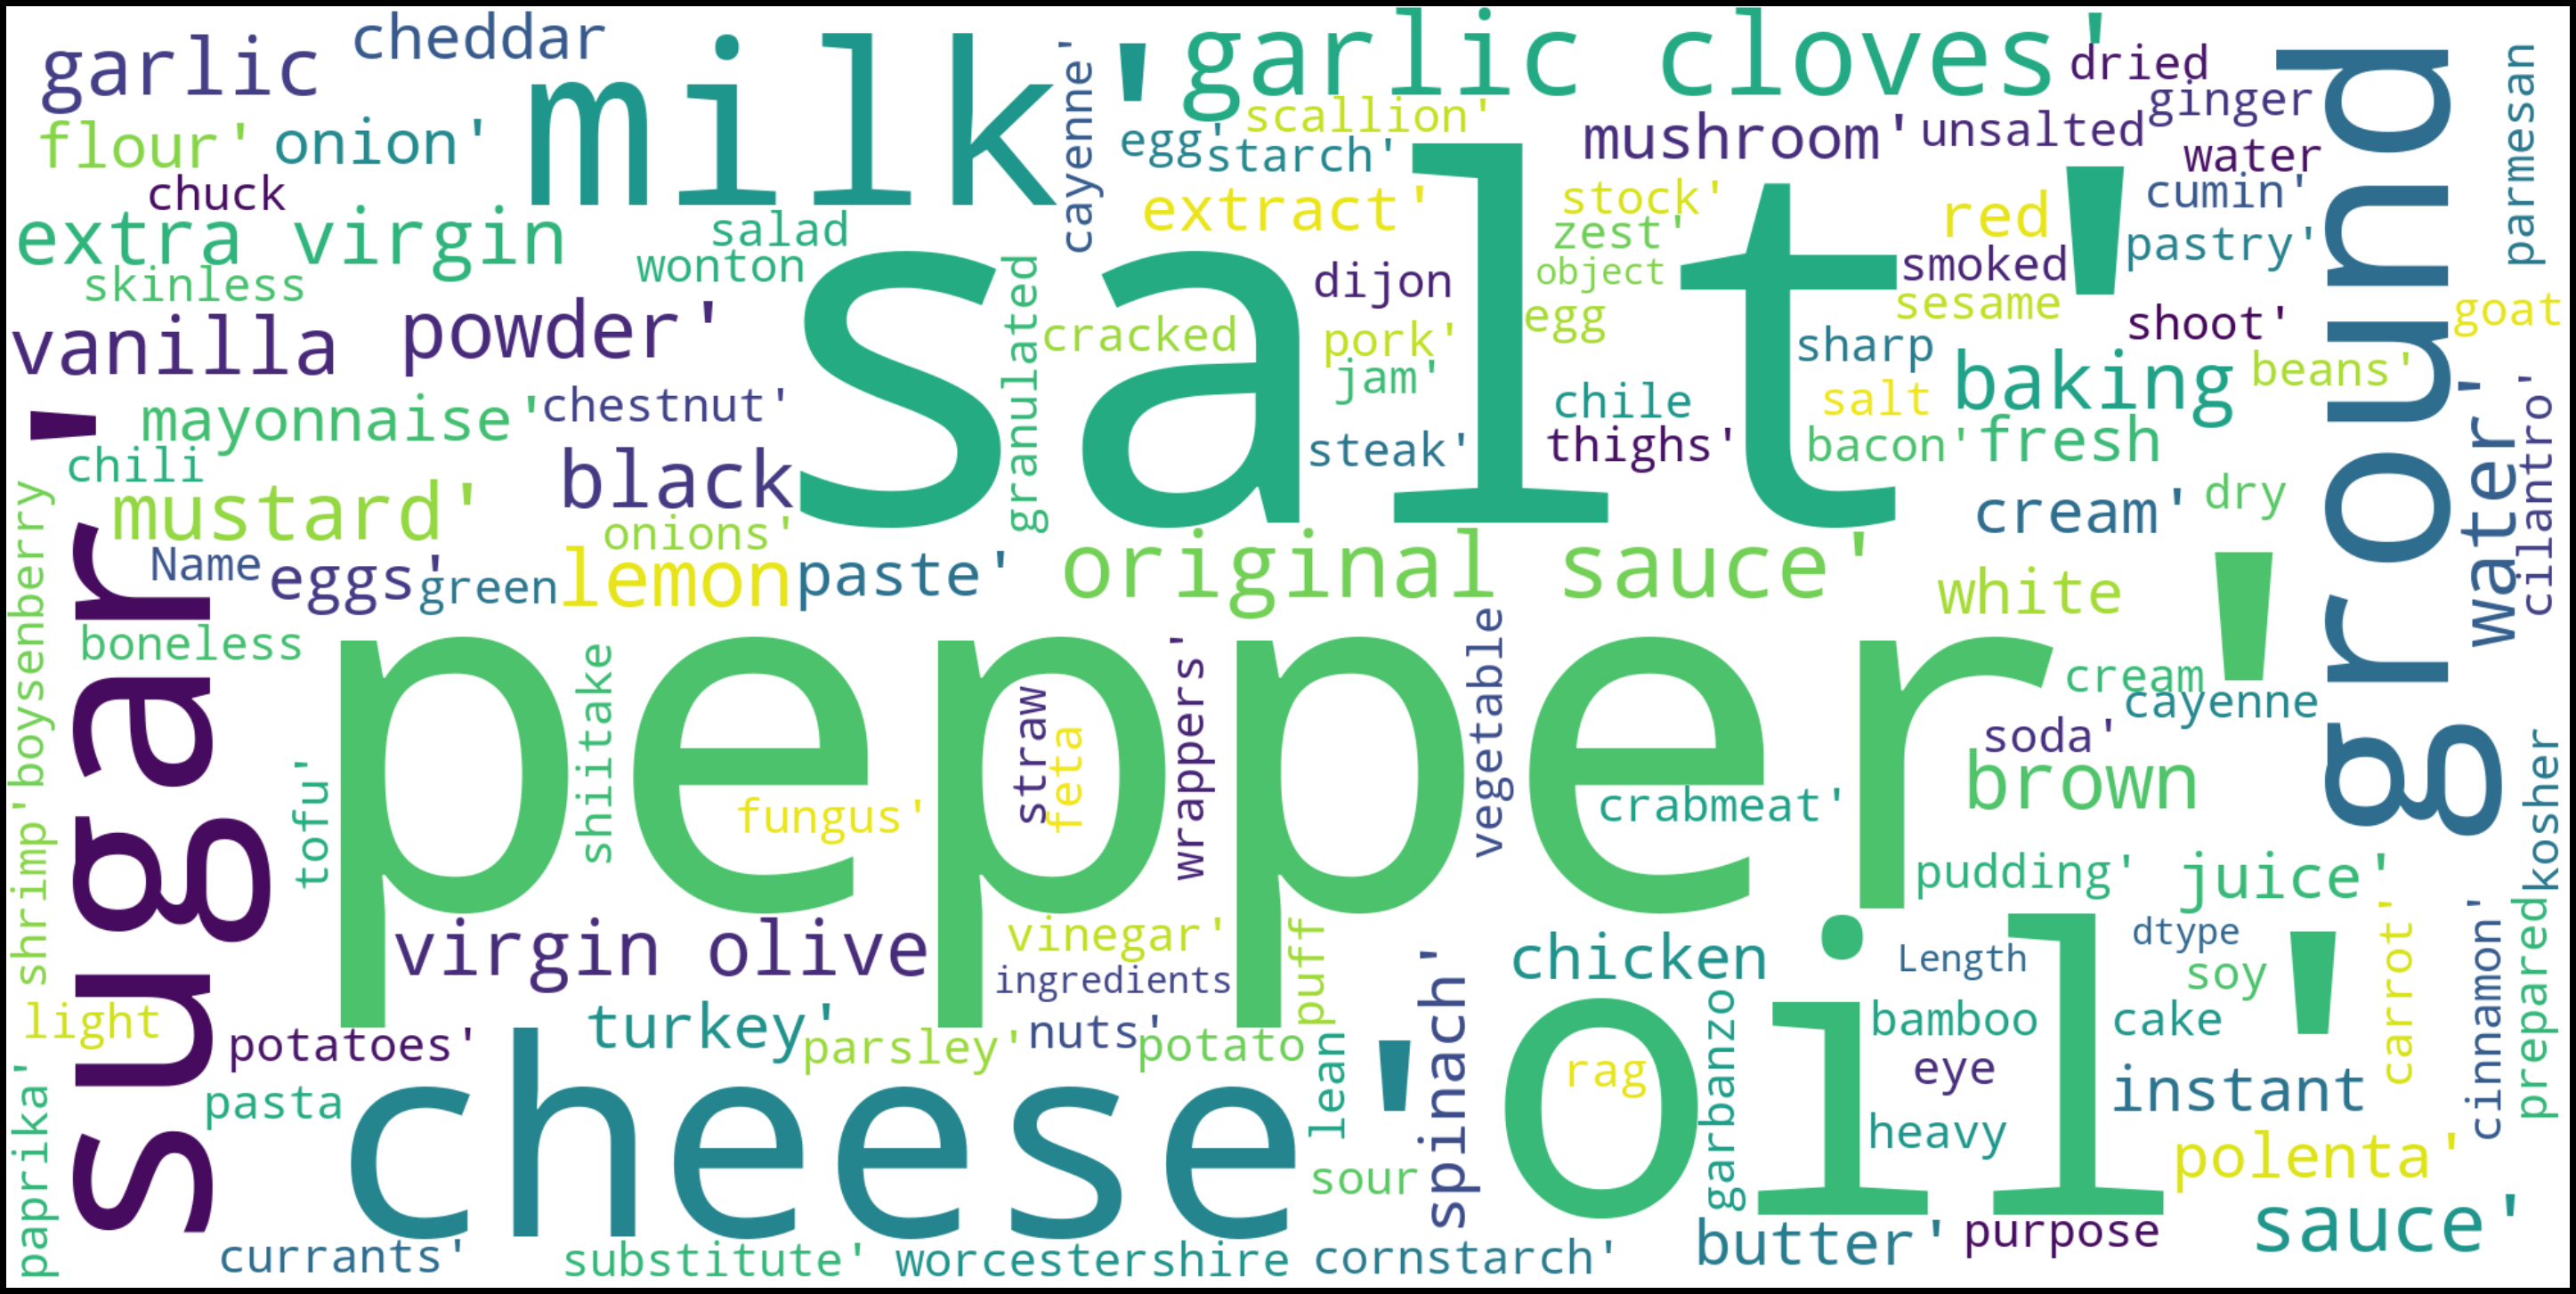

In [20]:
# Word cloun to see more common ingredients:
ingredients=recipes_25_reviews['ingredients']

print("Want to see the most common ingredients?")

wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(ingredients))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("./Charts/wordcloud_ingredients.png")
plt.show()


In [4]:
#names = pd.read_csv(file, usecols=['Shrt_Desc', 'Carbohydrt_(g)']).items
print("For further nutritional information for each specific ingredient please use nutrient checker below")
import pprint
pp = pprint.PrettyPrinter(indent=4)

categories = { }

for index, row in df.iterrows():
    name=row['Shrt_Desc']
    maincat =(name.split(",")[0])
    name = name.split(",")
    name.remove(maincat)
    subcats=(','.join(name))
    subcat_data={'Cholesterol':row['Cholestrl_(mg)'],'Carbs (g)':row['Carbohydrt_(g)'], 'Calories':row['Energ_Kcal'], 'Sugars':row['Sugar_Tot_(g)'], 'Sodium': row['Sodium_(mg)'], 'Saturated Fat':row['FA_Sat_(g)']}
    #     if maincat == 'MCDONALDS': 
    #         print(maincat + '->' + subcats )

    if maincat in categories.keys() and len(subcats) > 0:
        categories[maincat][subcats]=subcat_data
    elif len(subcats) >0:
        categories[maincat]={subcats:subcat_data}
    
pp.pprint(categories)

For further nutritional information for each specific ingredient please use nutrient checker below
{   'ABALONE': {   'MIXED SPECIES,RAW': {   'Calories': 105,
                                            'Carbs (g)': 6.01,
                                            'Cholesterol': 85.0,
                                            'Saturated Fat': 0.149,
                                            'Sodium': 301.0,
                                            'Sugars': 0.0},
                   'MXD SP,CKD,FRIED': {   'Calories': 189,
                                           'Carbs (g)': 11.05,
                                           'Cholesterol': 94.0,
                                           'Saturated Fat': 1.646,
                                           'Sodium': 591.0,
                                           'Sugars': nan}},
    'ABIYUCH': {   'RAW': {   'Calories': 69,
                              'Carbs (g)': 17.6,
                              'Cholesterol': nan,
    

                                                               'Carbs (g)': 61.23,
                                                               'Cholesterol': 0.0,
                                                               'Saturated Fat': 20.1,
                                                               'Sodium': 200.0,
                                                               'Sugars': 45.16},
                                      ' Date Filled Oatmeal': {   'Calories': 400,
                                                                  'Carbs (g)': 68.16,
                                                                  'Cholesterol': 6.0,
                                                                  'Saturated Fat': 2.76,
                                                                  'Sodium': 331.0,
                                                                  'Sugars': 34.27},
                                      ' Dutch Cocoa': {   'Calories': 431,
 

                                                     'Cholesterol': 0.0,
                                                     'Saturated Fat': 0.639,
                                                     'Sodium': 25.0,
                                                     'Sugars': 22.2},
                    'DINNER,APPLS&CHICK,STR': {   'Calories': 65,
                                                  'Carbs (g)': 10.88,
                                                  'Cholesterol': 5.0,
                                                  'Saturated Fat': 0.34700000000000003,
                                                  'Sodium': 12.0,
                                                  'Sugars': 6.06},
                    'DINNER,BF LASAGNA,TODD': {   'Calories': 77,
                                                  'Carbs (g)': 10.0,
                                                  'Cholesterol': nan,
                                                  'Saturated Fat': nan,
       

                                             'Sodium': 4.0,
                                             'Sugars': 10.5},
                    'JUC,APPL&CHERRY': {   'Calories': 41,
                                           'Carbs (g)': 9.9,
                                           'Cholesterol': 0.0,
                                           'Saturated Fat': 0.035,
                                           'Sodium': 0.0,
                                           'Sugars': 8.98},
                    'JUC,APPL&GRAPE': {   'Calories': 46,
                                          'Carbs (g)': 11.34,
                                          'Cholesterol': 0.0,
                                          'Saturated Fat': 0.04,
                                          'Sodium': 0.0,
                                          'Sugars': 10.9},
                    'JUC,APPL&PEACH': {   'Calories': 43,
                                          'Carbs (g)': 10.5,
                            

                                        'Saturated Fat': 0.11800000000000001,
                                        'Sodium': 25.0,
                                        'Sugars': 9.21},
                 'FRENCH,MATURE SEEDS,CKD,BLD,W/SALT': {   'Calories': 129,
                                                           'Carbs (g)': 24.02,
                                                           'Cholesterol': 0.0,
                                                           'Saturated Fat': 0.083,
                                                           'Sodium': 242.0,
                                                           'Sugars': nan},
                 'FRENCH,MATURE SEEDS,CKD,BLD,WO/SALT': {   'Calories': 129,
                                                            'Carbs (g)': 24.02,
                                                            'Cholesterol': 0.0,
                                                            'Saturated Fat': 0.083,
                    

    'BEEF': {   ' CHUCK, SHORT RIBS, BNL, 0" FAT, CHOICE, CKED, BR': {   'Calories': 250,
                                                                         'Carbs (g)': 0.0,
                                                                         'Cholesterol': 102.0,
                                                                         'Saturated Fat': 4.22,
                                                                         'Sodium': 75.0,
                                                                         'Sugars': 0.0},
                ' VAR MEATS&BY-PRODUCTS, LIVER, CKD, PAN-FRIED': {   'Calories': 175,
                                                                     'Carbs (g)': 5.16,
                                                                     'Cholesterol': 381.0,
                                                                     'Saturated Fat': 2.53,
                                                                     'Sodium': 77.0,
        

                                                                     'Sugars': 0.0},
                'CHUCK,ARM POT RST,LN&FAT,1/8"FAT,SEL,RAW': {   'Calories': 239,
                                                                'Carbs (g)': 0.0,
                                                                'Cholesterol': 93.0,
                                                                'Saturated Fat': 7.016,
                                                                'Sodium': 62.0,
                                                                'Sugars': 0.0},
                'CHUCK,ARM POT RST,LN,0"FAT,CHOIC,CKD,BRSD': {   'Calories': 212,
                                                                 'Carbs (g)': 0.0,
                                                                 'Cholesterol': 100.0,
                                                                 'Saturated Fat': 2.903,
                                                                 'Sodium': 54.

                                                                          'Saturated Fat': 5.331,
                                                                          'Sodium': 79.0,
                                                                          'Sugars': 0.0},
                'GROUND,85% LN MEAT / 15% FAT,RAW': {   'Calories': 215,
                                                        'Carbs (g)': 0.0,
                                                        'Cholesterol': 68.0,
                                                        'Saturated Fat': 5.715,
                                                        'Sodium': 66.0,
                                                        'Sugars': 0.0},
                'GROUND,90% LN MEAT / 10% FAT,CRUMBLES,CKD,PAN-BROWNED': {   'Calories': 230,
                                                                             'Carbs (g)': 0.0,
                                                                             'Cholest

                'NZ,IMP,SUBCUTANEOUS FAT,RAW': {   'Calories': 685,
                                                   'Carbs (g)': 0.0,
                                                   'Cholesterol': 64.0,
                                                   'Saturated Fat': 31.514,
                                                   'Sodium': 26.0,
                                                   'Sugars': 0.0},
                'NZ,IMP,SWEETBREAD,CKD,BLD': {   'Calories': 318,
                                                 'Carbs (g)': 0.0,
                                                 'Cholesterol': 249.0,
                                                 'Saturated Fat': 12.472999999999999,
                                                 'Sodium': 52.0,
                                                 'Sugars': 0.0},
                'NZ,IMP,SWEETBREAD,RAW': {   'Calories': 303,
                                             'Carbs (g)': 0.0,
                                    

                                                                    'Sugars': 0.0},
                'RIB,BACK RIBS,BONE-IN,LN,0" FAT,SEL,RAW': {   'Calories': 221,
                                                               'Carbs (g)': 0.2,
                                                               'Cholesterol': 67.0,
                                                               'Saturated Fat': 5.92,
                                                               'Sodium': 59.0,
                                                               'Sugars': 0.0},
                'RIB,EYE,SML END (RIBS 10- 12) LN,0" FAT,SEL,CKD,BRLD': {   'Calories': 182,
                                                                            'Carbs (g)': 0.0,
                                                                            'Cholesterol': 95.0,
                                                                            'Saturated Fat': 2.305,
                                           

                                                                               'Sodium': 68.0,
                                                                               'Sugars': 0.0},
                'RND,EYE OF RND,RST,LN & FAT,1/8" FAT,ALL GRDS,CKD,RSTD': {   'Calories': 208,
                                                                              'Carbs (g)': 0.0,
                                                                              'Cholesterol': 84.0,
                                                                              'Saturated Fat': 3.6639999999999997,
                                                                              'Sodium': 37.0,
                                                                              'Sugars': 0.0},
                'RND,EYE OF RND,RST,LN & FAT,1/8" FAT,ALL GRDS,RAW': {   'Calories': 166,
                                                                         'Carbs (g)': 0.0,
                                    

                                                                             'Cholesterol': 68.0,
                                                                             'Saturated Fat': 5.707000000000001,
                                                                             'Sodium': 72.0,
                                                                             'Sugars': 0.0},
                'SNDWCH STEAKS,FLAKED,CHOPD,FORMED & THINLY SLICED,RAW': {   'Calories': 309,
                                                                             'Carbs (g)': 0.0,
                                                                             'Cholesterol': 71.0,
                                                                             'Saturated Fat': 11.538,
                                                                             'Sodium': 68.0,
                                                                             'Sugars': 0.0},
                'TENDERLOIN,

                                                       'Sugars': 5.95},
                     'MONSTER ENERGY DRK,LO CARB': {   'Calories': 5,
                                                       'Carbs (g)': 1.38,
                                                       'Cholesterol': 0.0,
                                                       'Saturated Fat': 0.0,
                                                       'Sodium': 75.0,
                                                       'Sugars': 1.38},
                     'NESTLE,BOOST PLUS,NUTRITIONAL DRK,RTD': {   'Calories': 138,
                                                                  'Carbs (g)': 17.29,
                                                                  'Cholesterol': 4.0,
                                                                  'Saturated Fat': 0.42,
                                                                  'Sodium': 77.0,
                                                               

                                         'Sodium': 444.0,
                                         'Sugars': 0.82},
                 'POTATO': {   'Calories': 266,
                               'Carbs (g)': 47.07,
                               'Cholesterol': 0.0,
                               'Saturated Fat': 0.0,
                               'Sodium': 375.0,
                               'Sugars': 9.38},
                 'POUND CAKE TYPE,PAN DE TORTA SALVADORAN': {   'Calories': 390,
                                                                'Carbs (g)': 51.29,
                                                                'Cholesterol': nan,
                                                                'Saturated Fat': 3.042,
                                                                'Sodium': 390.0,
                                                                'Sugars': 18.1},
                 'PROT (INCL GLUTEN)': {   'Calories': 245,
                          

                                          'Sugars': nan},
                      'RAW': {   'Calories': 146,
                                 'Carbs (g)': 0.0,
                                 'Cholesterol': 65.0,
                                 'Saturated Fat': 3.38,
                                 'Sodium': 89.0,
                                 'Sugars': nan}},
    'BUTTERNUTS': {   'DRIED': {   'Calories': 612,
                                   'Carbs (g)': 12.05,
                                   'Cholesterol': 0.0,
                                   'Saturated Fat': 1.306,
                                   'Sodium': 1.0,
                                   'Sugars': nan}},
    'Babyfood': {   ' beverage, GERBER GRADUATE FRUIT SPLASHERS': {   'Calories': 31,
                                                                      'Carbs (g)': 7.4,
                                                                      'Cholesterol': 0.0,
                                             

                                                                               'Sodium': 381.0,
                                                                               'Sugars': 0.79},
                                  'FIESTA NACHO CHS SOUP,COND': {   'Calories': 97,
                                                                    'Carbs (g)': 8.06,
                                                                    'Cholesterol': 8.0,
                                                                    'Saturated Fat': 2.419,
                                                                    'Sodium': 637.0,
                                                                    'Sugars': 1.61},
                                  'FRENCH ONION SOUP,COND': {   'Calories': 36,
                                                                'Carbs (g)': 4.76,
                                                                'Cholesterol': 4.0,
                                        

                   'MARS SNACKFOOD US,TWIX CHOC FUDGE COOKIE BARS': {   'Calories': 550,
                                                                        'Carbs (g)': 56.0,
                                                                        'Cholesterol': 6.0,
                                                                        'Saturated Fat': 4.962,
                                                                        'Sodium': 266.0,
                                                                        'Sugars': 53.0},
                   'MARS SNACKFOOD US,TWIX PNUT BUTTER COOKIE BARS': {   'Calories': 536,
                                                                         'Carbs (g)': 54.15,
                                                                         'Cholesterol': 6.0,
                                                                         'Saturated Fat': 15.758,
                                                                         'Sodium

                                                    'Saturated Fat': 3.2880000000000003,
                                                    'Sodium': 280.0,
                                                    'Sugars': nan},
                   'CHANNEL,FARMED,CKD,DRY HEAT': {   'Calories': 144,
                                                      'Carbs (g)': 0.0,
                                                      'Cholesterol': 66.0,
                                                      'Saturated Fat': 1.5859999999999999,
                                                      'Sodium': 119.0,
                                                      'Sugars': 0.0},
                   'CHANNEL,FARMED,RAW': {   'Calories': 119,
                                             'Carbs (g)': 0.0,
                                             'Cholesterol': 55.0,
                                             'Saturated Fat': 1.31,
                                             'Sodium': 98.0,
    

                                                                'Carbs (g)': 85.5,
                                                                'Cholesterol': 0.0,
                                                                'Saturated Fat': 0.6,
                                                                'Sodium': 497.0,
                                                                'Sugars': 25.0},
                       'GENERAL MILLS,APPL CINN CHEERIOS': {   'Calories': 387,
                                                               'Carbs (g)': 81.3,
                                                               'Cholesterol': 0.0,
                                                               'Saturated Fat': 1.0,
                                                               'Sodium': 391.0,
                                                               'Sugars': 34.2},
                       'GENERAL MILLS,APPL CINN CHEX': {   'Calories': 408,
                   

                       'KELLOGG,SPL K,FRUIT & YOGURT': {   'Calories': 367,
                                                           'Carbs (g)': 85.3,
                                                           'Cholesterol': 0.0,
                                                           'Saturated Fat': 1.4,
                                                           'Sodium': 452.0,
                                                           'Sugars': 32.1},
                       'MALT-O-MEAL,APPL ZINGS': {   'Calories': 393,
                                                     'Carbs (g)': 83.51,
                                                     'Cholesterol': 0.0,
                                                     'Saturated Fat': 0.73,
                                                     'Sodium': 436.0,
                                                     'Sugars': 47.18},
                       'MALT-O-MEAL,BERRY COLOSSAL CRUNCH': {   'Calories': 406,
                    

                              'Saturated Fat': 17.41,
                              'Sodium': 629.0,
                              'Sugars': 0.45},
                  'CAMEMBERT': {   'Calories': 300,
                                   'Carbs (g)': 0.46,
                                   'Cholesterol': 72.0,
                                   'Saturated Fat': 15.259,
                                   'Sodium': 842.0,
                                   'Sugars': 0.46},
                  'CARAWAY': {   'Calories': 376,
                                 'Carbs (g)': 3.06,
                                 'Cholesterol': 93.0,
                                 'Saturated Fat': 18.584,
                                 'Sodium': 690.0,
                                 'Sugars': nan},
                  'CHEDDAR': {   'Calories': 406,
                                 'Carbs (g)': 1.33,
                                 'Cholesterol': 102.0,
                                 'Saturated Fat': 19.368

                   'BROILERS OR FRYERS,BACK,MEAT&SKN,CKD,RSTD': {   'Calories': 300,
                                                                    'Carbs (g)': 0.0,
                                                                    'Cholesterol': 88.0,
                                                                    'Saturated Fat': 5.82,
                                                                    'Sodium': 87.0,
                                                                    'Sugars': 0.0},
                   'BROILERS OR FRYERS,BACK,MEAT&SKN,CKD,STWD': {   'Calories': 258,
                                                                    'Carbs (g)': 0.0,
                                                                    'Cholesterol': 78.0,
                                                                    'Saturated Fat': 5.02,
                                                                    'Sodium': 64.0,
                                              

                                                               'Sugars': 0.0},
                   'GIZZARD,ALL CLASSES,CKD,SIMMRD': {   'Calories': 154,
                                                         'Carbs (g)': 0.0,
                                                         'Cholesterol': 370.0,
                                                         'Saturated Fat': 0.67,
                                                         'Sodium': 56.0,
                                                         'Sugars': 0.0},
                   'GIZZARD,ALL CLASSES,RAW': {   'Calories': 94,
                                                  'Carbs (g)': 0.0,
                                                  'Cholesterol': 240.0,
                                                  'Saturated Fat': 0.529,
                                                  'Sodium': 69.0,
                                                  'Sugars': 0.0},
                   'GROUND,CRUMBLES,CKD,PAN-BROWNED': {

                                      'Carbs (g)': 75.4,
                                      'Cholesterol': 0.0,
                                      'Saturated Fat': 0.19699999999999998,
                                      'Sodium': 37.0,
                                      'Sugars': 0.0},
                  'INST,REG,PDR,HALF THE CAFFEINE': {   'Calories': 352,
                                                        'Carbs (g)': 73.18,
                                                        'Cholesterol': 0.0,
                                                        'Saturated Fat': 0.19699999999999998,
                                                        'Sodium': 37.0,
                                                        'Sugars': 0.0},
                  'INST,REG,PREP W/H2O': {   'Calories': 2,
                                             'Carbs (g)': 0.34,
                                             'Cholesterol': 0.0,
                                             'Sat

                'SWT,WHITE,FRZ,KRNLS ON COB,CKD,BLD,DRND,WO/SALT': {   'Calories': 94,
                                                                       'Carbs (g)': 22.33,
                                                                       'Cholesterol': 0.0,
                                                                       'Saturated Fat': 0.114,
                                                                       'Sodium': 4.0,
                                                                       'Sugars': nan},
                'SWT,WHITE,FRZ,KRNLS ON COB,UNPREP': {   'Calories': 98,
                                                         'Carbs (g)': 23.5,
                                                         'Cholesterol': 0.0,
                                                         'Saturated Fat': 0.12,
                                                         'Sodium': 5.0,
                                                         'Sugars': nan},
            

                    'RYE,WAFERS,PLAIN': {   'Calories': 334,
                                            'Carbs (g)': 80.4,
                                            'Cholesterol': 0.0,
                                            'Saturated Fat': 0.10800000000000001,
                                            'Sodium': 557.0,
                                            'Sugars': 1.01},
                    'RYE,WAFERS,SEASONED': {   'Calories': 381,
                                               'Carbs (g)': 73.8,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 1.287,
                                               'Sodium': 887.0,
                                               'Sugars': nan},
                    'SALTINES (INCL OYSTER,SODA,SOUP)': {   'Calories': 418,
                                                            'Carbs (g)': 74.05,
                                                        

                                                                       'Sugars': nan},
                          'CHS TOPPING,RISING CRUST,FRZ,BKD': {   'Calories': 256,
                                                                  'Carbs (g)': 31.78,
                                                                  'Cholesterol': 15.0,
                                                                  'Saturated Fat': 3.514,
                                                                  'Sodium': 696.0,
                                                                  'Sugars': 5.0},
                          'CHS TOPPING,THIN CRISPY CRUST,FRZ,BKD': {   'Calories': 247,
                                                                       'Carbs (g)': 26.47,
                                                                       'Cholesterol': 21.0,
                                                                       'Saturated Fat': 4.601,
                                    

                                     'Sugars': 2.46}},
    'EGG ROLLS': {   'CHICK,REFR,HTD': {   'Calories': 197,
                                           'Carbs (g)': 28.54,
                                           'Cholesterol': 14.0,
                                           'Saturated Fat': 0.9640000000000001,
                                           'Sodium': 478.0,
                                           'Sugars': 5.57},
                     'PORK,REFR,HTD': {   'Calories': 222,
                                          'Carbs (g)': 29.5,
                                          'Cholesterol': 14.0,
                                          'Saturated Fat': 1.588,
                                          'Sodium': 407.0,
                                          'Sugars': 5.32},
                     'VEG,FRZ,PREP': {   'Calories': 214,
                                         'Carbs (g)': 31.77,
                                         'Cholesterol': 0.0,
           

                      'CHSEBURGER; DBLE,REG,PATTY & BN; W/ CONDMNT & VEG': {   'Calories': 285,
                                                                               'Carbs (g)': 23.3,
                                                                               'Cholesterol': 41.0,
                                                                               'Saturated Fat': 5.6,
                                                                               'Sodium': 404.0,
                                                                               'Sugars': nan},
                      'CLAMS,BREADED&FRIED': {   'Calories': 392,
                                                 'Carbs (g)': 33.75,
                                                 'Cholesterol': 76.0,
                                                 'Saturated Fat': 5.742000000000001,
                                                 'Sodium': 725.0,
                                                 'Sugars':

                                                 'Sugars': nan},
                'DEVILFISH,MEAT (ALASKA NATIVE)': {   'Calories': 97,
                                                      'Carbs (g)': 0.0,
                                                      'Cholesterol': nan,
                                                      'Saturated Fat': nan,
                                                      'Sodium': nan,
                                                      'Sugars': nan},
                'FISH STKS,FRZ,PREP': {   'Calories': 277,
                                          'Carbs (g)': 21.66,
                                          'Cholesterol': 28.0,
                                          'Saturated Fat': 3.733,
                                          'Sodium': 402.0,
                                          'Sugars': 1.65},
                'HALIBUT,CKD,W/ SKN (ALASKA NATIVE)': {   'Calories': 113,
                                                          'Ca

                            'SUGAR FREE,CREAMSICLE POPS': {   'Calories': 49,
                                                              'Carbs (g)': 11.95,
                                                              'Cholesterol': 0.0,
                                                              'Saturated Fat': 2.0,
                                                              'Sodium': 6.0,
                                                              'Sugars': 0.43}},
    'FROZEN NOVL': {   'KLONDIKE,SLIM-A-BEAR,NO SGR ADDED,STICKLESS BAR': {   'Calories': 242,
                                                                              'Carbs (g)': 25.98,
                                                                              'Cholesterol': 8.0,
                                                                              'Saturated Fat': 10.4,
                                                                              'Sodium': 86.0,
                               

                     'DEER,GROUND,CKD,PAN-BROILED': {   'Calories': 187,
                                                        'Carbs (g)': 0.0,
                                                        'Cholesterol': 98.0,
                                                        'Saturated Fat': 3.9930000000000003,
                                                        'Sodium': 78.0,
                                                        'Sugars': 0.0},
                     'DEER,GROUND,RAW': {   'Calories': 157,
                                            'Carbs (g)': 0.0,
                                            'Cholesterol': 80.0,
                                            'Saturated Fat': 3.361,
                                            'Sodium': 75.0,
                                            'Sugars': 0.0},
                     'DEER,LOIN,LN,1" STEAK,CKD,BRLD': {   'Calories': 150,
                                                           'Carbs (g)': 0.0,
          

                                                                            'Carbs (g)': 9.73,
                                                                            'Cholesterol': 0.0,
                                                                            'Saturated Fat': 0.019,
                                                                            'Sodium': 1.0,
                                                                            'Sugars': 9.63},
                          'WHITE,FRZ CONC,UNSWTND,UNDIL': {   'Calories': 146,
                                                              'Carbs (g)': 34.56,
                                                              'Cholesterol': 0.0,
                                                              'Saturated Fat': 0.064,
                                                              'Sodium': 3.0,
                                                              'Sugars': 34.16},
                          'WHITE,RAW': 

                                                    'Sugars': nan}},
    'HUMMUS': {   'COMMERCIAL': {   'Calories': 166,
                                    'Carbs (g)': 14.29,
                                    'Cholesterol': 0.0,
                                    'Saturated Fat': 1.4369999999999998,
                                    'Sodium': 379.0,
                                    'Sugars': nan},
                  'HOME PREP': {   'Calories': 177,
                                   'Carbs (g)': 20.12,
                                   'Cholesterol': 0.0,
                                   'Saturated Fat': 1.141,
                                   'Sodium': 242.0,
                                   'Sugars': 0.27}},
    'HUSH PUPPIES': {   'PREP FROM RECIPE': {   'Calories': 337,
                                                'Carbs (g)': 46.0,
                                                'Cholesterol': 45.0,
                                                'Saturated Fa

                                                                            'Sugars': 54.7},
                       ' ABBOTT NUTR, SIMILAC, LO IRON, RTF': {   'Calories': 65,
                                                                  'Carbs (g)': 6.93,
                                                                  'Cholesterol': 2.0,
                                                                  'Saturated Fat': 1.237,
                                                                  'Sodium': 16.0,
                                                                  'Sugars': 6.93},
                       ' ABBOTT NUTR, SIMILAC, LO IRON,LIQ CONC,NOT RECO': {   'Calories': 127,
                                                                               'Carbs (g)': 13.76,
                                                                               'Cholesterol': 3.0,
                                                                               'Saturated Fat': 2.401,
  

                                                        'Saturated Fat': 0.66,
                                                        'Sodium': 166.0,
                                                        'Sugars': 1.0},
                 'H2H WOVEN WHEAT CRACKER,ORIGINAL': {   'Calories': 396,
                                                         'Carbs (g)': 73.4,
                                                         'Cholesterol': 0.0,
                                                         'Saturated Fat': 1.1,
                                                         'Sodium': 283.0,
                                                         'Sugars': 0.4},
                 'H2H WOVEN WHEAT CRACKER,RSTD GARLIC': {   'Calories': 440,
                                                            'Carbs (g)': 73.2,
                                                            'Cholesterol': 0.0,
                                                            'Saturated Fat': 1.1,
     

                                                                     'Carbs (g)': 58.7,
                                                                     'Cholesterol': 5.0,
                                                                     'Saturated Fat': 9.5,
                                                                     'Sodium': 333.0,
                                                                     'Sugars': 22.5},
                   'SANDIES,PECAN SHORTBREAD COOKIES,RED FAT': {   'Calories': 488,
                                                                   'Carbs (g)': 67.1,
                                                                   'Cholesterol': 0.0,
                                                                   'Saturated Fat': 6.6,
                                                                   'Sodium': 401.0,
                                                                   'Sugars': 23.9},
                   'SANDIES,SIMPLY SHORTBREAD 

                     'POP-TARTS,ICE CRM SHOPPE FRSTD RAINBOW CHIP TOASTE': {   'Calories': 400,
                                                                               'Carbs (g)': 70.8,
                                                                               'Cholesterol': 3.0,
                                                                               'Saturated Fat': 4.0,
                                                                               'Sodium': 391.0,
                                                                               'Sugars': 30.3},
                     'POP-TARTS,ICE CRM SHOPPE FRSTD STRAWBERRY MILKSHAK': {   'Calories': 397,
                                                                               'Carbs (g)': 70.0,
                                                                               'Cholesterol': 2.0,
                                                                               'Saturated Fat': 3.9,
                    

                'DOM,LEG,SHANK HALF,LN&FAT,1/4"FAT,CHOIC,CKD,RSTD': {   'Calories': 225,
                                                                        'Carbs (g)': 0.0,
                                                                        'Cholesterol': 90.0,
                                                                        'Saturated Fat': 5.09,
                                                                        'Sodium': 65.0,
                                                                        'Sugars': nan},
                'DOM,LEG,SHANK HALF,LN&FAT,1/4"FAT,CHOIC,RAW': {   'Calories': 201,
                                                                   'Carbs (g)': 0.0,
                                                                   'Cholesterol': 67.0,
                                                                   'Saturated Fat': 5.8,
                                                                   'Sodium': 57.0,
                            

                                                                             'Sodium': 65.0,
                                                                             'Sugars': 0.0},
                'NZ,IMP,LEG CHOP/STEAK,BONE-IN,LN & FAT,RAW': {   'Calories': 206,
                                                                  'Carbs (g)': 0.13,
                                                                  'Cholesterol': 67.0,
                                                                  'Saturated Fat': 5.902,
                                                                  'Sodium': 59.0,
                                                                  'Sugars': 0.0},
                'NZ,IMP,LEG CHOP/STEAK,BONE-IN,LN,CKD,FAST FRIED': {   'Calories': 162,
                                                                       'Carbs (g)': 0.0,
                                                                       'Cholesterol': 78.0,
                                    

                   'COS OR ROMAINE,RAW': {   'Calories': 17,
                                             'Carbs (g)': 3.29,
                                             'Cholesterol': 0.0,
                                             'Saturated Fat': 0.039,
                                             'Sodium': 8.0,
                                             'Sugars': 1.19},
                   'GRN LEAF,RAW': {   'Calories': 15,
                                       'Carbs (g)': 2.87,
                                       'Cholesterol': 0.0,
                                       'Saturated Fat': 0.02,
                                       'Sodium': 28.0,
                                       'Sugars': 0.78},
                   'ICEBERG (INCL CRISPHEAD TYPES),RAW': {   'Calories': 14,
                                                             'Carbs (g)': 2.97,
                                                             'Cholesterol': 0.0,
                                    

                                           'Cholesterol': 0.0,
                                           'Saturated Fat': 0.17600000000000002,
                                           'Sodium': 1.0,
                                           'Sugars': 0.56},
                    'DRY,ENR': {   'Calories': 371,
                                   'Carbs (g)': 74.67,
                                   'Cholesterol': 0.0,
                                   'Saturated Fat': 0.27699999999999997,
                                   'Sodium': 6.0,
                                   'Sugars': 2.67},
                    'DRY,UNENRICHED': {   'Calories': 371,
                                          'Carbs (g)': 74.67,
                                          'Cholesterol': 0.0,
                                          'Saturated Fat': 0.27699999999999997,
                                          'Sodium': 6.0,
                                          'Sugars': 2.67},
                    'P

                     "NEWMAN'S OWN CREAMY CAESAR DRSNG": {   'Calories': 319,
                                                             'Carbs (g)': 6.85,
                                                             'Cholesterol': 35.0,
                                                             'Saturated Fat': 5.86,
                                                             'Sodium': 851.0,
                                                             'Sugars': 3.0},
                     "NEWMAN'S OWN LOFAT BALSAMIC VINAIGRETTE": {   'Calories': 86,
                                                                    'Carbs (g)': 24.65,
                                                                    'Cholesterol': 0.0,
                                                                    'Saturated Fat': 0.87,
                                                                    'Sodium': 1562.0,
                                                                    'Sugars': 6.74},

    'MORNINGSTAR FARMS BRKFST PATTIE': {   'FRZ,UNPREP': {   'Calories': 205,
                                                             'Carbs (g)': 10.61,
                                                             'Cholesterol': 2.0,
                                                             'Saturated Fat': 1.1,
                                                             'Sodium': 632.0,
                                                             'Sugars': 1.5}},
    'MORNINGSTAR FARMS BRKFST PATTIE W/ ORGANIC SOY': {   'FRZ,UNPREP': {   'Calories': 220,
                                                                            'Carbs (g)': 12.6,
                                                                            'Cholesterol': 0.0,
                                                                            'Saturated Fat': 1.0,
                                                                            'Sodium': 690.0,
                                              

                                                     'Sodium': 412.0,
                                                     'Sugars': 37.6},
                  'HONEY GRAHAM': {   'Calories': 445,
                                      'Carbs (g)': 75.7,
                                      'Cholesterol': 0.0,
                                      'Saturated Fat': 3.2,
                                      'Sodium': 477.0,
                                      'Sugars': 22.0},
                  'JACKS VANILLA WAFERS': {   'Calories': 438,
                                              'Carbs (g)': 78.1,
                                              'Cholesterol': 6.0,
                                              'Saturated Fat': 3.8,
                                              'Sodium': 331.0,
                                              'Sugars': 37.6},
                  'LEMON CREME SNDWCH COOKIES': {   'Calories': 479,
                                                    'Carbs (g)'

    'OIL': {   'ALMOND': {   'Calories': 884,
                             'Carbs (g)': 0.0,
                             'Cholesterol': 0.0,
                             'Saturated Fat': 8.2,
                             'Sodium': 0.0,
                             'Sugars': 0.0},
               'APRICOT KERNEL': {   'Calories': 884,
                                     'Carbs (g)': 0.0,
                                     'Cholesterol': 0.0,
                                     'Saturated Fat': 6.3,
                                     'Sodium': 0.0,
                                     'Sugars': 0.0},
               'AVOCADO': {   'Calories': 884,
                              'Carbs (g)': 0.0,
                              'Cholesterol': nan,
                              'Saturated Fat': 11.56,
                              'Sodium': 0.0,
                              'Sugars': nan},
               'BABASSU': {   'Calories': 884,
                              'Carbs (g)': 0.0,
   

                                                                            'Sodium': 2.0,
                                                                            'Sugars': 8.31},
                      'CND,UNSWTND': {   'Calories': 47,
                                         'Carbs (g)': 11.01,
                                         'Cholesterol': 0.0,
                                         'Saturated Fat': 0.018000000000000002,
                                         'Sodium': 4.0,
                                         'Sugars': 8.76},
                      'FRZ CONC,UNSWTND,DIL W/3 VOLUME H2O': {   'Calories': 37,
                                                                 'Carbs (g)': 8.8,
                                                                 'Cholesterol': 0.0,
                                                                 'Saturated Fat': 0.015,
                                                                 'Sodium': 4.0,
                         

                                                                   'Sodium': 445.0,
                                                                   'Sugars': 21.86}},
    'PANCAKES': {   'BLUEBERRY,PREP FROM RECIPE': {   'Calories': 222,
                                                      'Carbs (g)': 29.0,
                                                      'Cholesterol': 56.0,
                                                      'Saturated Fat': 1.986,
                                                      'Sodium': 412.0,
                                                      'Sugars': nan},
                    'BTTRMLK,PREP FROM RECIPE': {   'Calories': 227,
                                                    'Carbs (g)': 28.7,
                                                    'Cholesterol': 58.0,
                                                    'Saturated Fat': 1.8319999999999999,
                                                    'Sodium': 522.0,
                     

                'GRN,FRZ,CKD,BLD,DRND,WO/SALT': {   'Calories': 78,
                                                    'Carbs (g)': 14.26,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': 0.049,
                                                    'Sodium': 72.0,
                                                    'Sugars': 4.65},
                'GRN,FRZ,UNPREP': {   'Calories': 77,
                                      'Carbs (g)': 13.62,
                                      'Cholesterol': 0.0,
                                      'Saturated Fat': 0.066,
                                      'Sodium': 108.0,
                                      'Sugars': 5.0},
                'GRN,SPLIT,MATURE SEEDS,RAW': {   'Calories': 352,
                                                  'Carbs (g)': 63.74,
                                                  'Cholesterol': 0.0,
                           

                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 3.7969999999999997,
                                               'Sodium': 201.0,
                                               'Sugars': 15.65},
               'APPL,COMMLY PREP,UNENR FLR': {   'Calories': 237,
                                                 'Carbs (g)': 34.0,
                                                 'Cholesterol': 0.0,
                                                 'Saturated Fat': 3.7969999999999997,
                                                 'Sodium': 266.0,
                                                 'Sugars': nan},
               'APPL,PREP FROM RECIPE': {   'Calories': 265,
                                            'Carbs (g)': 37.1,
                                            'Cholesterol': 0.0,
                                            'Saturated Fat': 3.05,
                                            '

                 'CND,PURPLE,H2O PK,SOL&LIQUIDS': {   'Calories': 41,
                                                      'Carbs (g)': 11.03,
                                                      'Cholesterol': 0.0,
                                                      'Saturated Fat': 0.001,
                                                      'Sodium': 1.0,
                                                      'Sugars': 10.1},
                 'CND,PURPLE,HVY SYRUP PK,SOL&LIQUIDS': {   'Calories': 89,
                                                            'Carbs (g)': 23.24,
                                                            'Cholesterol': 0.0,
                                                            'Saturated Fat': 0.008,
                                                            'Sodium': 19.0,
                                                            'Sugars': 22.31},
                 'CND,PURPLE,JUC PK,SOL&LIQUIDS': {   'Calories': 58,
                    

                'CURED,HAM W/ NAT JUICES,SPIRAL SLICE,BNLESS,LN,UNHTD': {   'Calories': 109,
                                                                            'Carbs (g)': 1.22,
                                                                            'Cholesterol': 57.0,
                                                                            'Saturated Fat': 1.0090000000000001,
                                                                            'Sodium': 895.0,
                                                                            'Sugars': 1.22},
                'CURED,HAM W/ NAT JUICES,SPIRL SLCE,BNLES,LN & FAT,UNHTD': {   'Calories': 129,
                                                                               'Carbs (g)': 1.18,
                                                                               'Cholesterol': 57.0,
                                                                               'Saturated Fat': 1.8330000000000002,
      

                                                                               'Saturated Fat': 2.767,
                                                                               'Sodium': 64.0,
                                                                               'Sugars': 0.0},
                'FRSH,LOIN,CNTR LOIN (CHOPS),BNLESS,LN & FAT,RAW': {   'Calories': 201,
                                                                       'Carbs (g)': 0.0,
                                                                       'Cholesterol': 59.0,
                                                                       'Saturated Fat': 4.413,
                                                                       'Sodium': 82.0,
                                                                       'Sugars': 0.0},
                'FRSH,LOIN,CNTR LOIN (CHOPS),BNLESS,LN,CKD,PAN-BROILED': {   'Calories': 162,
                                                                           

                                                               'Carbs (g)': 0.6,
                                                               'Cholesterol': 82.0,
                                                               'Saturated Fat': 5.39,
                                                               'Sodium': 191.0,
                                                               'Sugars': nan},
                'FRSH,VAR MEATS&BY-PRODUCTS,FEET,CKD,SIMMRD': {   'Calories': 238,
                                                                  'Carbs (g)': 0.0,
                                                                  'Cholesterol': 107.0,
                                                                  'Saturated Fat': 4.343,
                                                                  'Sodium': 73.0,
                                                                  'Sugars': 0.0},
                'FRSH,VAR MEATS&BY-PRODUCTS,FEET,RAW': {   'Calories': 212,
     

                                              'Sugars': nan},
                    "O'BRIEN,HOME-PREPARED": {   'Calories': 81,
                                                 'Carbs (g)': 15.47,
                                                 'Cholesterol': 4.0,
                                                 'Saturated Fat': 0.797,
                                                 'Sodium': 217.0,
                                                 'Sugars': nan},
                    'RAW,SKIN': {   'Calories': 58,
                                    'Carbs (g)': 12.44,
                                    'Cholesterol': 0.0,
                                    'Saturated Fat': 0.026000000000000002,
                                    'Sodium': 10.0,
                                    'Sugars': nan},
                    'RED,FLESH & SKN,BKD': {   'Calories': 89,
                                               'Carbs (g)': 19.59,
                                               'Cholestero

                    'TAPIOCA,RTE': {   'Calories': 130,
                                       'Carbs (g)': 21.69,
                                       'Cholesterol': 1.0,
                                       'Saturated Fat': 0.9620000000000001,
                                       'Sodium': 145.0,
                                       'Sugars': 14.91},
                    'TAPIOCA,RTE,FAT FREE': {   'Calories': 94,
                                                'Carbs (g)': 21.31,
                                                'Cholesterol': 1.0,
                                                'Saturated Fat': 0.122,
                                                'Sodium': 187.0,
                                                'Sugars': 14.18},
                    'VANILLA,DRY MIX,INST': {   'Calories': 377,
                                                'Carbs (g)': 92.9,
                                                'Cholesterol': 0.0,
                                  

                                                        'Saturated Fat': 2.946,
                                                        'Sodium': 800.0,
                                                        'Sugars': 0.24},
                      'FAMILY STYLE,CHILI W/ MEAT & BNS': {   'Calories': 157,
                                                              'Carbs (g)': 4.57,
                                                              'Cholesterol': 45.0,
                                                              'Saturated Fat': 4.023,
                                                              'Sodium': 381.0,
                                                              'Sugars': 2.27},
                      'FAMILY STYLE,COLESLAW': {   'Calories': 159,
                                                   'Carbs (g)': 12.35,
                                                   'Cholesterol': 8.0,
                                                   'Saturated Fat': 1.909,
  

                                    'Saturated Fat': 0.015,
                                    'Sodium': 72.0,
                                    'Sugars': 0.0}},
    'ROWAL': {   'RAW': {   'Calories': 111,
                            'Carbs (g)': 23.9,
                            'Cholesterol': nan,
                            'Saturated Fat': 0.245,
                            'Sodium': 4.0,
                            'Sugars': 14.1}},
    'RUFFED GROUSE': {   'BREAST MEAT,SKINLESS,RAW': {   'Calories': 112,
                                                         'Carbs (g)': 0.0,
                                                         'Cholesterol': 40.0,
                                                         'Saturated Fat': 0.13,
                                                         'Sodium': 50.0,
                                                         'Sugars': 0.0}},
    'RUTABAGAS': {   'CKD,BLD,DRND,W/SALT': {   'Calories': 30,
                                    

                                       'Sugars': 18.75},
                 'TARTAR,RTS': {   'Calories': 211,
                                   'Carbs (g)': 13.3,
                                   'Cholesterol': 7.0,
                                   'Saturated Fat': 3.333,
                                   'Sodium': 667.0,
                                   'Sugars': 4.25},
                 'TERIYAKI,RTS': {   'Calories': 89,
                                     'Carbs (g)': 15.56,
                                     'Cholesterol': 0.0,
                                     'Saturated Fat': 0.0,
                                     'Sodium': 3833.0,
                                     'Sugars': 14.1},
                 'TERIYAKI,RTS,RED NA': {   'Calories': 89,
                                            'Carbs (g)': 15.58,
                                            'Cholesterol': 0.0,
                                            'Saturated Fat': 0.0,
                              

    'SHAD': {   'AMERICAN,CKD,DRY HEAT': {   'Calories': 252,
                                             'Carbs (g)': 0.0,
                                             'Cholesterol': 96.0,
                                             'Saturated Fat': nan,
                                             'Sodium': 65.0,
                                             'Sugars': nan},
                'AMERICAN,RAW': {   'Calories': 197,
                                    'Carbs (g)': 0.0,
                                    'Cholesterol': 75.0,
                                    'Saturated Fat': 3.1260000000000003,
                                    'Sodium': 51.0,
                                    'Sugars': 0.0}},
    'SHAKE': {   'FAST FD,STRAWBERRY': {   'Calories': 113,
                                           'Carbs (g)': 18.9,
                                           'Cholesterol': 11.0,
                                           'Saturated Fat': 1.734,
                         

                  'PRETZELS,HARD,WHOLE-WHEAT INCL BOTH SALTED & UNSALTED': {   'Calories': 362,
                                                                               'Carbs (g)': 81.3,
                                                                               'Cholesterol': 0.0,
                                                                               'Saturated Fat': 0.56,
                                                                               'Sodium': 203.0,
                                                                               'Sugars': nan},
                  'RICE CAKES,BROWN RICE,CORN': {   'Calories': 385,
                                                    'Carbs (g)': 81.2,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': 0.63,
                                                    'Sodium': 167.0,
                                                    'Sugar

                'CHUNKY VEG,RED NA,CND,RTS': {   'Calories': 50,
                                                 'Carbs (g)': 10.28,
                                                 'Cholesterol': nan,
                                                 'Saturated Fat': nan,
                                                 'Sodium': 138.0,
                                                 'Sugars': 2.78},
                'CLAM CHOWDER,MANHATTAN STYLE,CND,CHUNKY,RTS': {   'Calories': 56,
                                                                   'Carbs (g)': 7.84,
                                                                   'Cholesterol': 6.0,
                                                                   'Saturated Fat': 0.88,
                                                                   'Sodium': 417.0,
                                                                   'Sugars': 1.67},
                'CLAM CHOWDER,MANHATTAN,CND,COND': {   'Calories': 61,
         

                                          'Sugars': 4.31},
                'VEGETARIAN VEG,CND,COND': {   'Calories': 59,
                                               'Carbs (g)': 9.78,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 0.24,
                                               'Sodium': 516.0,
                                               'Sugars': 3.13},
                'VEGETARIAN VEG,CND,PREP W/ EQ VOLUME H2O': {   'Calories': 28,
                                                                'Carbs (g)': 4.89,
                                                                'Cholesterol': 0.0,
                                                                'Saturated Fat': 0.12,
                                                                'Sodium': 338.0,
                                                                'Sugars': 1.57},
                'WONTON,CHINESE RESTAURANT': {   'C

                                          'Saturated Fat': 0.021,
                                          'Sodium': 3.0,
                                          'Sugars': nan},
                  'WINTER,HUBBARD,RAW': {   'Calories': 40,
                                            'Carbs (g)': 8.7,
                                            'Cholesterol': 0.0,
                                            'Saturated Fat': 0.10300000000000001,
                                            'Sodium': 7.0,
                                            'Sugars': 3.95},
                  'WNTR,ACORN,CKD,BKD,W/SALT': {   'Calories': 56,
                                                   'Carbs (g)': 14.58,
                                                   'Cholesterol': 0.0,
                                                   'Saturated Fat': 0.028999999999999998,
                                                   'Sodium': 240.0,
                                                   'Sugars': nan

    'SWAMP CABBAGE': {   '(SKUNK CABBAGE),RAW': {   'Calories': 19,
                                                    'Carbs (g)': 3.14,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': nan,
                                                    'Sodium': 113.0,
                                                    'Sugars': nan},
                         'CKD,BLD,DRND,W/SALT': {   'Calories': 20,
                                                    'Carbs (g)': 3.71,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': nan,
                                                    'Sodium': 358.0,
                                                    'Sugars': nan},
                         'CKD,BLD,DRND,WO/SALT': {   'Calories': 20,
                                                     'Carbs (g)': 3.71,
               

                                                       'Carbs (g)': 33.63,
                                                       'Cholesterol': 13.0,
                                                       'Saturated Fat': 2.31,
                                                       'Sodium': 453.0,
                                                       'Sugars': 1.3}},
    'TARO': {   'COOKED,WITH SALT': {   'Calories': 142,
                                        'Carbs (g)': 34.6,
                                        'Cholesterol': 0.0,
                                        'Saturated Fat': 0.023,
                                        'Sodium': 251.0,
                                        'Sugars': 0.49},
                'COOKED,WITHOUT SALT': {   'Calories': 142,
                                           'Carbs (g)': 34.6,
                                           'Cholesterol': 0.0,
                                           'Saturated Fat': 0.023,
                     

                                             'Carbs (g)': 44.64,
                                             'Cholesterol': 0.0,
                                             'Saturated Fat': 0.45299999999999996,
                                             'Sodium': 45.0,
                                             'Sugars': 0.88},
                     'RTB OR -FRY,CORN,WO/ SALT': {   'Calories': 222,
                                                      'Carbs (g)': 46.6,
                                                      'Cholesterol': 0.0,
                                                      'Saturated Fat': 0.33399999999999996,
                                                      'Sodium': 11.0,
                                                      'Sugars': nan},
                     'RTB OR -FRY,FLR,REFR': {   'Calories': 293,
                                                 'Carbs (g)': 51.18,
                                                 'Cholesterol': 0.0,
          

                                                             'Sugars': 0.0},
                  'RTL PARTS,BREAST,MEAT ONLY,RAW': {   'Calories': 114,
                                                        'Carbs (g)': 0.0,
                                                        'Cholesterol': 53.0,
                                                        'Saturated Fat': 0.344,
                                                        'Sodium': 74.0,
                                                        'Sugars': 0.0},
                  'RTL PARTS,DRUMSTK,MEAT & SKN,CKD,RSTD': {   'Calories': 197,
                                                               'Carbs (g)': 0.0,
                                                               'Cholesterol': 120.0,
                                                               'Saturated Fat': 2.588,
                                                               'Sodium': 112.0,
                                                              

                                                           'Sugars': nan},
                          'CHS,CHEDDAR,RED FAT': {   'Calories': 282,
                                                     'Carbs (g)': 2.0,
                                                     'Cholesterol': 56.0,
                                                     'Saturated Fat': 11.58,
                                                     'Sodium': 725.0,
                                                     'Sugars': 0.58},
                          'PORK SAUSAGE,BULK/LINKS/PATTIES,FRZ,RAW': {   'Calories': 231,
                                                                         'Carbs (g)': 0.0,
                                                                         'Cholesterol': 73.0,
                                                                         'Saturated Fat': 4.968,
                                                                         'Sodium': 507.0,
                               

                                                           'Saturated Fat': 3.4,
                                                           'Sodium': 96.0,
                                                           'Sugars': nan},
                'SHLDR,WHL (ARM&BLD),LN&FAT,RAW': {   'Calories': 130,
                                                      'Carbs (g)': 0.0,
                                                      'Cholesterol': 87.0,
                                                      'Saturated Fat': 2.05,
                                                      'Sodium': 91.0,
                                                      'Sugars': 0.0},
                'SHLDR,WHL (ARM&BLD),LN,CKD,BRSD': {   'Calories': 199,
                                                       'Carbs (g)': 0.0,
                                                       'Cholesterol': 130.0,
                                                       'Saturated Fat': 1.7,
                                   

                   'ULTIMATE CHICK GRILL SNDWCH': {   'Calories': 179,
                                                      'Carbs (g)': 18.88,
                                                      'Cholesterol': 40.0,
                                                      'Saturated Fat': 1.03,
                                                      'Sodium': 427.0,
                                                      'Sugars': nan}},
    'WHALE': {   'BELUGA,EYES (ALASKA NATIVE)': {   'Calories': 291,
                                                    'Carbs (g)': 0.0,
                                                    'Cholesterol': nan,
                                                    'Saturated Fat': nan,
                                                    'Sodium': nan,
                                                    'Sugars': 0.0},
                 'BELUGA,FLIPPER,RAW (ALASKA NATIVE)': {   'Calories': 271,
                                                           'Carbs

                      'MATURE SEEDS,CKD,BLD,WO/ SALT': {   'Calories': 147,
                                                           'Carbs (g)': 14.94,
                                                           'Cholesterol': 0.0,
                                                           'Saturated Fat': 0.825,
                                                           'Sodium': 13.0,
                                                           'Sugars': nan},
                      'MATURE SEEDS,RAW': {   'Calories': 409,
                                              'Carbs (g)': 41.71,
                                              'Cholesterol': 0.0,
                                              'Saturated Fat': 2.303,
                                              'Sodium': 38.0,
                                              'Sugars': nan}},
    'WOCAS': {   'DRIED SEEDS,OREGON,YEL POND LILY (KLAMATH)': {   'Calories': 361,
                                                           

In [5]:
for key in sorted(categories.keys()):
    print(key)

ABALONE
ABIYUCH
ACEROLA
ACEROLA JUICE
ACORN FLOUR
ACORNS
AGAVE
AGUTUK
ALCOHOLIC BEV
ALFALFA SEEDS
ALLSPICE
ALMOND BUTTER
ALMONDS
AMARANTH GRAIN
AMARANTH LEAVES
ANCHOVY
ANIMAL FAT
APPLE JUC
APPLEBEE'S
APPLES
APPLESAUCE
APRICOT NECTAR
APRICOTS
ARCHWAY HOME STYLE COOKIES
ARCHWAY Home Style Cookies
ARROWHEAD
ARROWROOT
ARTICHOKES
ARTIFICIAL BLUEBERRY MUFFIN MIX
ARUGULA
ASPARAGUS
AUSTIN
AVOCADOS
BABY FD
BABYFD
BABYFOO
BABYFOOD
BACON
BACON BITS
BAGEL
BAGELS
BAK CHOC
BAKING CHOC
BALSAM-PEAR (BITTER GOURD)
BAMBOO SHOOTS
BANANAS
BARBARA DEE
BARBECUE LOAF
BARLEY
BASIL
BASS
BEANS
BEAR
BEAR NAKED
BEE
BEECHNUTS
BEEF
BEEF BROTH&TOMATO JUC
BEEF JERKY
BEEF MACARONI W/ TOMATO SAU
BEEF POT PIE
BEEF SAUSAGE
BEEF STEW
BEERWURST
BEET GREENS
BEET GRNS
BEETS
BEV
BEVE
BEVERAGE
BEVERAGES
BF
BISCUIT
BISCUITS
BISON
BLACKBERRIES
BLACKBERRY JUC
BLUEBERRIES
BLUEFISH
BOLOGNA
BORAGE
BOYSENBERRIES
BRATWURST
BRAUNSCHWEIGER (A LIVER SAUSAGE)
BRAZILNUTS
BREAD
BREAD CRUMBS
BREAD STICKS
BREAD STUFFING
BREADFRUIT
BREADFRUIT 

In [6]:
for key in sorted(subcat_data.keys()):
    print(key)

Calories
Carbs (g)
Cholesterol
Saturated Fat
Sodium
Sugars


This is the nutrition checker! Please refer to above listed keys and select inputs from what is availble :)
What is your main food categoryMilk


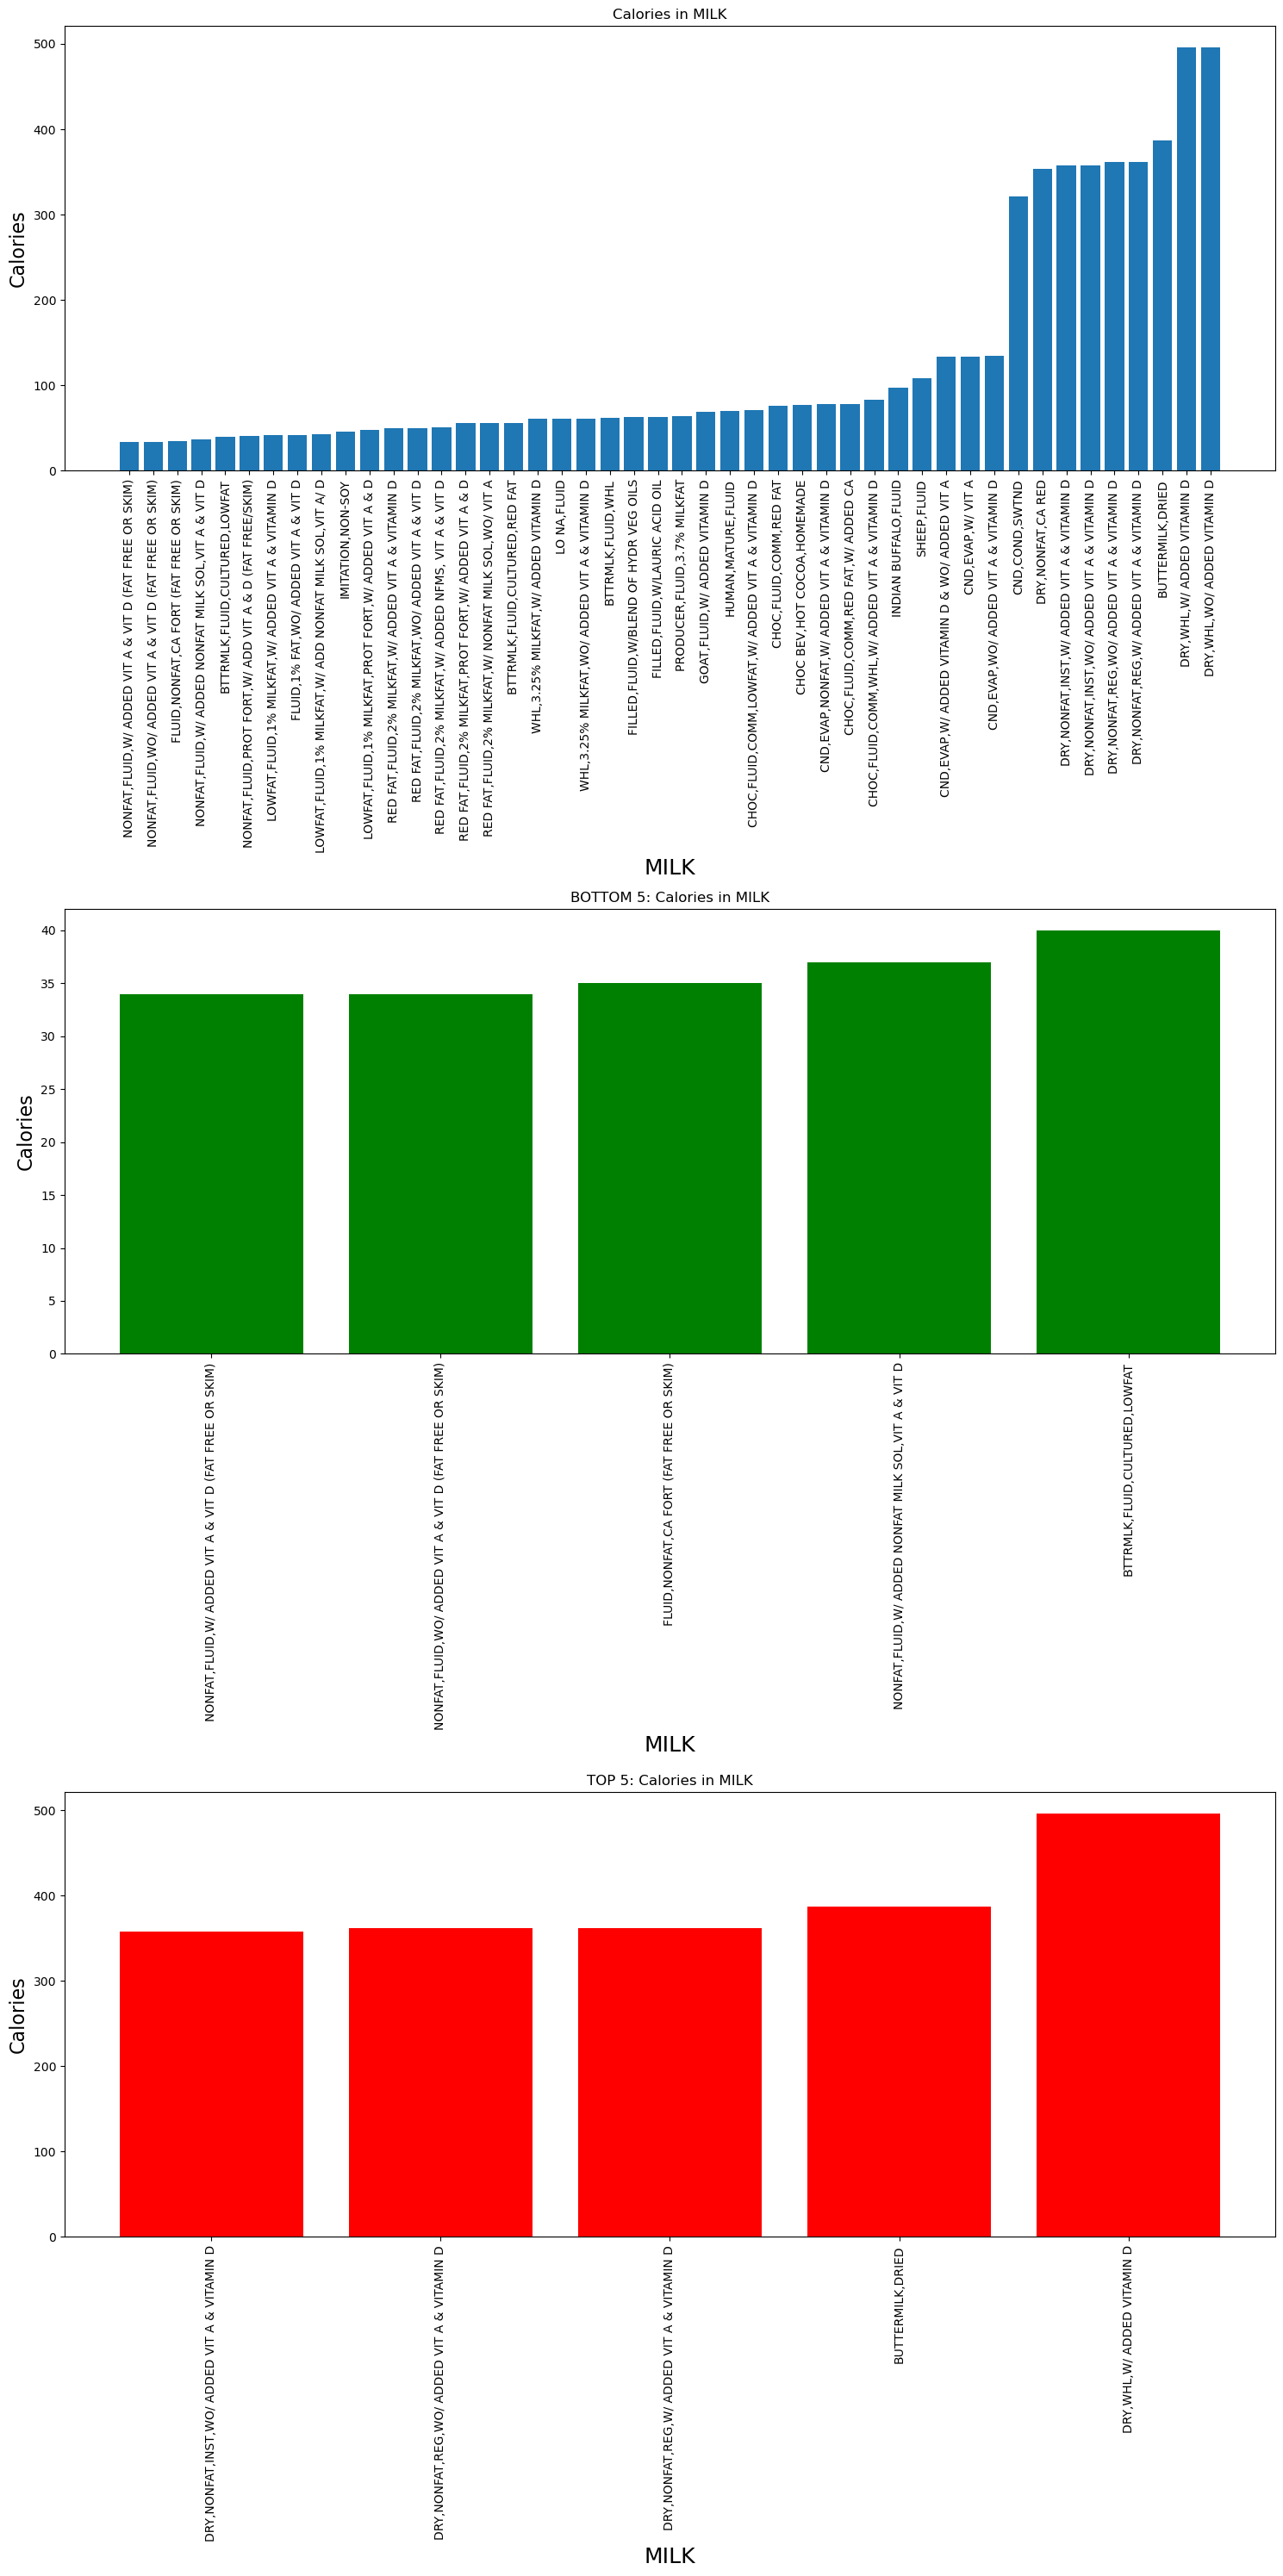

In [7]:
print("This is the nutrition checker! Please refer to above listed keys and select inputs from what is availble :)")

selectedcategory = input("What is your main food category").upper()
category_data = categories[selectedcategory]
selectednutrient = "Calories"
def sortByNutrient(item):
    #print(item)
    return item["value"] #index 0 is the key and index 1 is the selected nutrient
#returns a value we want it to be sorted 


sorted_data = []
for item in category_data.items(): #items is both the keys and the items in the dictionary
    sorted_data.append({"key":item[0],"value":item[1][selectednutrient]})

sorted_data.sort(key=sortByNutrient)
sorted_data_bottom = sorted_data[0:5]
sorted_data_top = sorted_data[-6:-1]
#print(sorted_data_bottom)


x_axis = np.arange(len(sorted_data))
y_values = []
x_labels = []


for item in sorted_data:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)

#######subplots

plt.rcdefaults()
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15, 30))

fig.subplots_adjust(top=8)


ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_labels, fontsize = 10,rotation="vertical")
ax1.bar(x_axis, y_values)
ax1.set_xlabel(f'{selectedcategory}', fontsize=18)
ax1.set_ylabel(f'{selectednutrient}', fontsize=16)
ax1.set_title(f'{selectednutrient} in {selectedcategory}')
#plt.savefig("./Esther's Resources/calories.png")



#########bottom 5 code


x_axis = np.arange(len(sorted_data_bottom))
y_values = []
x_labels = []


for item in sorted_data_bottom:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)


#fig2.xticks(x_axis,x_labels,fontsize = 5, rotation="vertical")
ax2.set_xticks(x_axis)
ax2.set_xticklabels(x_labels, fontsize = 10, rotation="vertical")
ax2.bar(x_axis, y_values, color='green')
ax2.set_xlabel(f'{selectedcategory}', fontsize=18)
ax2.set_ylabel(f'{selectednutrient}', fontsize=16)
ax2.set_title(f'BOTTOM 5: {selectednutrient} in {selectedcategory}')


#########top 5 code


x_axis = np.arange(len(sorted_data_top))
y_values = []
x_labels = []


for item in sorted_data_top:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)


#fig2.xticks(x_axis,x_labels,fontsize = 5, rotation="vertical")
ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_labels, fontsize = 10,rotation="vertical")
ax3.bar(x_axis, y_values, color='red')
ax3.set_xlabel(f'{selectedcategory}', fontsize=18)
ax3.set_ylabel(f'{selectednutrient}', fontsize=16)
ax3.set_title(f'TOP 5: {selectednutrient} in {selectedcategory}')


fig.tight_layout()

fig.savefig(f"./Charts/{selectednutrient}allplots.png")






#tick_locations = [value+0.4 for value in x_axis]
#plt.figure(figsize=(20,3))


# plt.bar(x_axis, food_df2["Carbohydrt_(g)"], color='r', alpha=0.5, align="edge")


